CO1: Determine the relationship between dependent and independent variables encountered in specific domains using multiple linear regression and its error metrics (MSE, MAE, RMSE)		6 Hours   
1. Multiple-linear regression, 
2. mean squared error, 
3. mean absolute error, 
4. root mean squared error.

#### Hyperplane   
We cannot solve our problems with the same thinking we used when we created them. – Albert Einstein 

[refer](https://ms.copernicus.org/articles/12/933/2021/?source=post_page-----1c49bca9bbee--------------------------------) A toy-inspired kirigami pattern and its kinematic performance by applying mechanisms and machine theory    
(https://www.youtube.com/watch?v=8jE-ATI8utA) and a [video](https://www.youtube.com/watch?v=8jE-ATI8utA) explaing how to achieve this with origami.   

[Action Lab](https://www.theactionlabhome.com/)   

#### High-dimensional data   
In the context of data analysis and ML, is a dataset with a large number of features.  
Each of those represents a different “dimension” in our data.  

##### 1. One-Dimensional Space (Line)   
Consider a line segment from 0 to 1. The middle part is between 0.1 and 0.9.  
The chance of a random point landing here is $\frac{length\ of\ middle\ segment}{total\ length} = \frac{0.8}{1} = 0.8$

##### 2. Two-Dimensional Space (Square)

Consider a square with each side ranging from 0 to 1.  
The middle region is a smaller square with each side from 0.1 to 0.9.  
Comparing the area of this smaller square to the total area, gives us a probability of 0.64.   

##### 3. Three-Dimensional Space (Cube)

For a cube with each edge measuring 1, the middle region is a smaller cube with each edge from 0.1 to 0.9.  
The probability is the volume of this smaller cube divided by the total volume, resulting in 0.512.  

##### 4. Higher Dimensions (Hypercube)

Consider the length of each side as 1.   

In a hypercube of n dimensions, the ‘volume’ of the middle region shrinks as dimensions increase.  
E.g., in 4D, the probability is 0.4096; in 5D, it’s 0.32768; and in 10D, it drops to ~ 0.10737.

Consider the edge to be of a small distance x.  
For a line, the probability of a point falling in the middle region is 1–2x.  
For a square, it’s (1–2x)*(1–2x), as a point must fall in the middle of both dimensions.  

Probability of a point falling in the middle region is $(1–2x)^n$, becoming very small in higher dimensions.

##### SVM and the Kernel Trick    

The kernel trick in Support Vector Machines (SVMs) shows a similar idea. In SVMs, we often encounter data that is not linearly separable. The kernel trick overcomes this by transforming the data into a higher-dimensional space.  

The kernel trick, like folding the paper, adds dimensions, making it easier to find a hyperplane that does the job.  
The data, initially non-linearly separable becomes separable in 2D.  
This transformation solves our problem. 

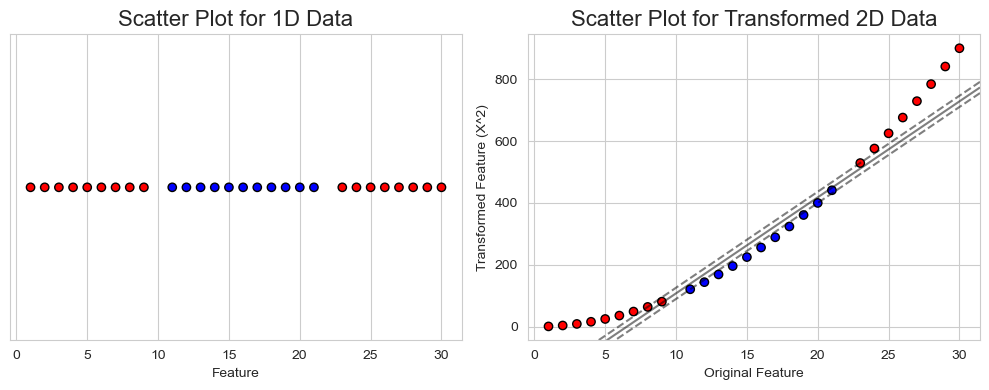

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# data that is not linearly seperable in 1D
x = np.array([1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30]).reshape(-1, 1) 
y = np.array([1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]) 

# Non-linear transformation to 2D, (squaring)
def transform_to_2d(X):
    return np.c_[X, X**2]

# Transforming data to 2D
X_transformed = transform_to_2d(x)

# Fitting SVM with a linear kernel in the transformed 2D space
svm = SVC(kernel='linear')
svm.fit(X_transformed, y)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 1D data plot
axes[0].scatter(x, np.zeros_like(x), c=y, cmap='bwr', edgecolors='k')
axes[0].set_title('Scatter Plot for 1D Data', fontsize=16)
axes[0].set_xlabel('Feature')
axes[0].set_yticks([])

# 2D transformed data plot
axes[1].scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='bwr', edgecolors='k')
axes[1].set_title('Scatter Plot for Transformed 2D Data', fontsize=16)
axes[1].set_xlabel('Original Feature')
axes[1].set_ylabel('Transformed Feature (X^2)')

# Plotting the decision boundary in 2D
ax = axes[1]
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Getting the separating hyperplane
Z = svm.decision_function(xy).reshape(XX.shape)

# Plotting decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.tight_layout()
plt.show()